## Life Expectancy and GDP

In this project, I explore data from the World Health Organization and World Bank on life expectancy and gdp. This is an attempt to identify relationships between gdp and life expectancy for 6 countries. The data has entries for each of the years from 2000 to 2015.


## Import libraries

First we import the necessary libraries in python to be used for our analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels

## Load data and take a look

Import our data and take a first look.

In [2]:
lgdp = pd.read_csv('all_data.csv')
# File found on GitHub along with this Notebook
# Alternatively this link from code academy could be used. https://content.codecademy.com/PRO/paths/data-science/Life-Expectancy-and-GDP-Code-Solution.zip?_gl=1*p3v3vp*_ga*MTU5ODMxNjg1Ni4xNjUzNjY2MDcy*_ga_3LRZM6TM9L*MTY1NDI3NzA0NS45LjEuMTY1NDI3NzE1MS41Mg..

print(lgdp.head(), '\n', lgdp.sample(5), '\n', lgdp.tail())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10 
                      Country  Year  Life expectancy at birth (years)  \
92                  Zimbabwe  2012                              56.6   
67  United States of America  2003                              77.2   
31                     China  2015                              76.1   
28                     China  2012                              75.4   
5                      Chile  2005                              78.4   

             GDP  
92  1.424249e+10  
67  1.150000e+13  
31  1.106470e+13  
28  8.560550e+12  
5   1.229650e+11   
      Country  Year  Life expectancy at birth (years)           GD

In [3]:
print(lgdp.info())
print(lgdp.describe())
print('\n', lgdp.Country.unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.75000

### First Impression
There are 6 countries in this dataset. Life expectancies measure between 44 and 81. GDP ranges from \\$4.4 billion to \\$18 trillion. Data was taken for each country in each year 2000 thru 2015.

### Box Plots

Lets explore the data a bit more by country to get an idea of the spread and basic statistics.

Average life expectancy for:
   Chile:  78.94
   China:  74.26
   Germany:  79.66
   Mexico:  75.72
   United States of America:  78.06
   Zimbabwe:  50.09

 Gain in life expectancy 2000-2015 for:
   Chile:  3.2
   China:  4.4
   Germany:  3.0
   Mexico:  1.9
   United States of America:  2.5
   Zimbabwe:  14.7


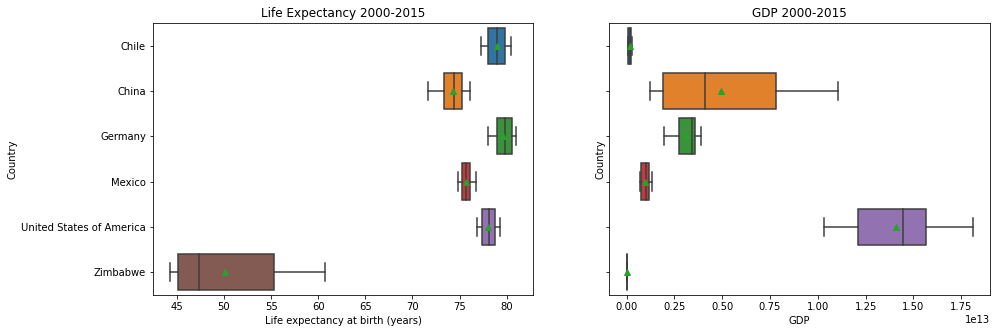

In [13]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.boxplot(ax=axes[0], data=lgdp, y='Country', x='Life expectancy at birth (years)', showmeans=True)
axes[0].set_title('Life Expectancy 2000-2015')

axes[1] = sns.boxplot(ax=axes[1], data=lgdp, y='Country', x='GDP', showmeans=True)
axes[1].set_title('GDP 2000-2015')


# What is the average life expectancy in each country?
countries = list(lgdp.Country.unique())
print('Average life expectancy for:')
for country in countries:
    life_exp = lgdp['Life expectancy at birth (years)'][lgdp.Country == country]
    life_exp_mean = round(life_exp.mean(), 2)
    print(f'   {country}:  {life_exp_mean}')

print('\n', 'Gain in life expectancy 2000-2015 for:')
for country in countries:
    life_exp_2015 = round(float(lgdp['Life expectancy at birth (years)'][(lgdp.Country == country) & (lgdp.Year == 2015)]), 2)
    life_exp_2000 = round(float(lgdp['Life expectancy at birth (years)'][(lgdp.Country == country) & (lgdp.Year == 2000)]), 2)
    life_gain = life_exp_2015 - life_exp_2000
    life_gain = round(life_gain, 2)
    print(f'   {country}:  {life_gain}')
    


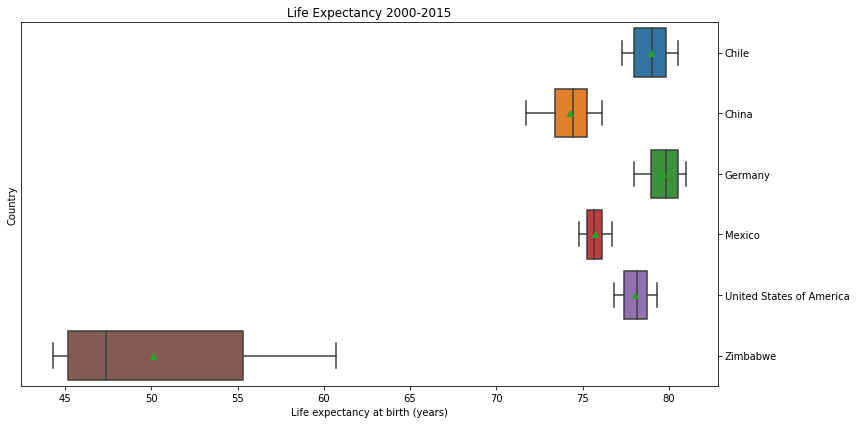

In [48]:
fig, ax = plt.subplots(figsize=(12,6))
fig.set_tight_layout(True)
ax = sns.boxplot(data=lgdp, y='Country', x='Life expectancy at birth (years)', showmeans=True)
ax.set_title('Life Expectancy 2000-2015')
ax.yaxis.set_ticks_position('right')

plt.savefig('life_exp_countries.png', dpi=300)

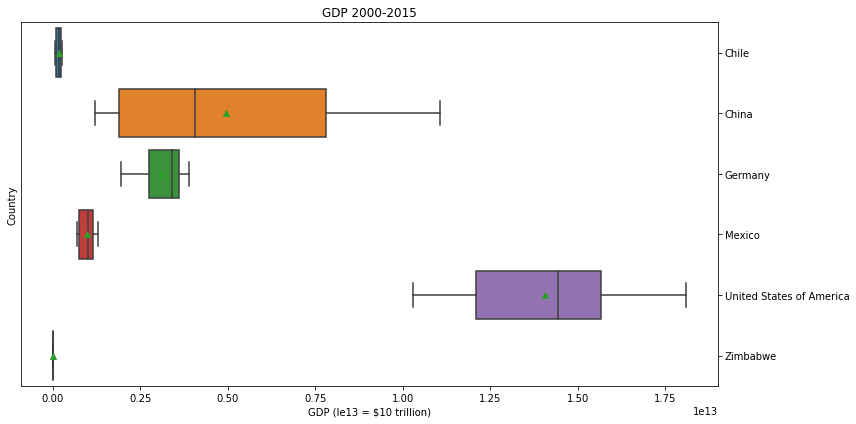

In [47]:
fig, ax = plt.subplots(figsize=(12,6))
fig.set_tight_layout(True)
ax = sns.boxplot(data=lgdp, y='Country', x='GDP', showmeans=True)
ax.set_title('GDP 2000-2015')
ax.set_xlabel('GDP (le13 = $10 trillion)')
ax.yaxis.set_ticks_position('right')

plt.savefig('gdp_countries.png', dpi=300, pad_inches=.7)

Zimbabwe stands out for its low life expectancy, but the range is quite wide. For GDP, three distinct groups emerge. Let us call them the __Wealthy Nations__(United States, China, and Germany), the __Less Wealthy Nations__(Mexico and Chile), and __Zimbabwe__. 

How does it look when we separate them by these wealth categories?

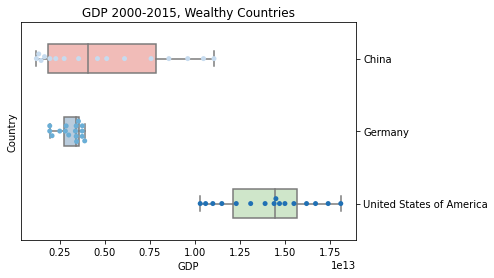

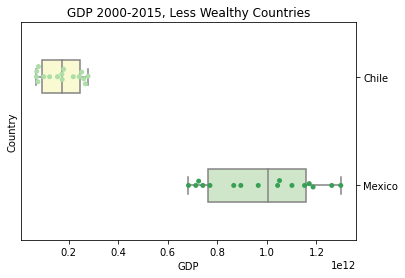

<Figure size 432x288 with 0 Axes>

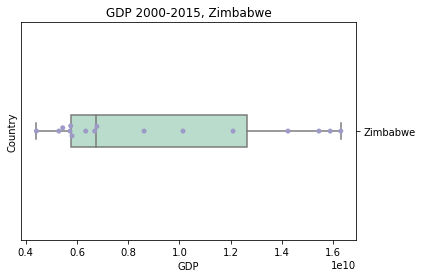

<Figure size 432x288 with 0 Axes>

In [5]:
lgdp_wealthy = lgdp[(lgdp.Country == 'United States of America') | (lgdp.Country == 'China') | (lgdp.Country == 'Germany')]
lgdp_less_wealthy = lgdp[(lgdp.Country == 'Chile') | (lgdp.Country == 'Mexico')]
lgdp_zimbabwe = lgdp[lgdp.Country == 'Zimbabwe']


ax1 = sns.boxplot(data=lgdp_wealthy, y='Country', x='GDP', palette='Pastel1', width=0.4)
ax1 = sns.swarmplot(data=lgdp_wealthy, y='Country', x='GDP', palette='Blues')
ax1.yaxis.set_ticks_position('right')
plt.xticks(rotation=0)
plt.title('GDP 2000-2015, Wealthy Countries')
plt.show()
plt.clf()

ax2 = sns.boxplot(data=lgdp_less_wealthy, y='Country', x='GDP', palette='Pastel1_r', width=0.3)
ax2 = sns.swarmplot(data=lgdp_less_wealthy, y='Country', x='GDP', palette='Greens')
ax2.yaxis.set_ticks_position('right')
plt.xticks(rotation=0)
plt.title('GDP 2000-2015, Less Wealthy Countries')
plt.show()
plt.clf()

plt.figure()
ax3 = sns.boxplot(data=lgdp_zimbabwe, y='Country', x='GDP', palette='Pastel2', width=0.15)
ax3 = sns.swarmplot(data=lgdp_zimbabwe, y='Country', x='GDP', palette='Purples')
ax3.yaxis.set_ticks_position('right')
plt.xticks(rotation=0)
plt.title('GDP 2000-2015, Zimbabwe')
plt.show()
plt.clf()


Now we have a decent idea of the dispersion in life expectancy and gdp of each of the six countries in the dataset. 

### Line Plots

We can explore further by using the time series values. Let us see the results for life expectancy and gdp by country.

<class 'list'>


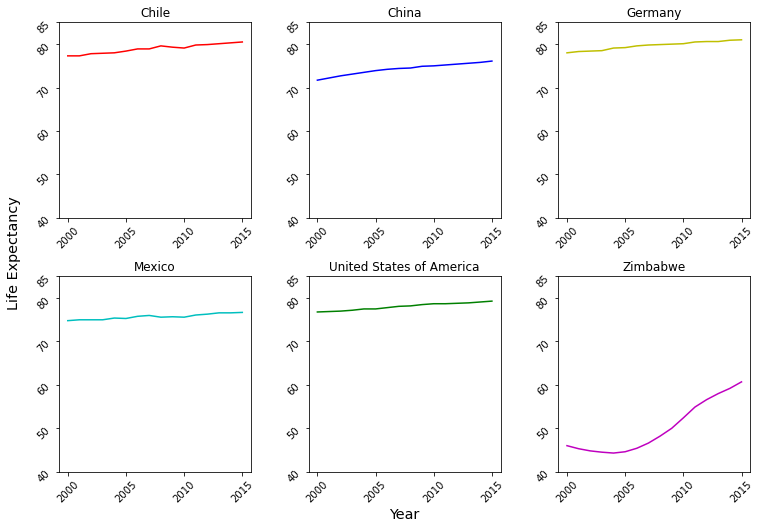

In [6]:
countries = list(lgdp.Country.unique())

print(type(countries))

fig, axs = plt.subplots(2, 3, figsize=(12, 8))
plt.subplots_adjust(left=0.1,
                    bottom=0.12, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)

xtick_years = [2000, 2005, 2010, 2015]
ytick_exp = [40, 50, 60, 70, 80, 85]
colors = ['r', 'b', 'y', 'c', 'g', 'm']

for country in countries:
    j = countries.index(country)
    if j < 3:
        i = 0
        k = j
    else:
        i = 1
        k = j - 3
    x=lgdp.Year[lgdp.Country == country]
    y=lgdp['Life expectancy at birth (years)'][lgdp.Country == country]
    axs[i, k].plot(x, y, color=colors[j])
    axs[i, k].tick_params(labelrotation=45)
    axs[i, k].set_yticks(ticks=ytick_exp)
    axs[i, k].set_xticks(ticks=xtick_years)
    axs[i, k].set_title(label=country)

fig.text(0.5, 0.04, 'Year', ha='center', fontsize='x-large')
fig.text(0.04, 0.5, 'Life Expectancy', va='center', rotation='vertical', fontsize='x-large')    
plt.show()


The trend in life expectancies is upward in each country. Zimbabwe experienced the largest change in the 15 year period. This could be related to the low initial starting point.

Doing the same analysis for gdp.

<class 'list'>


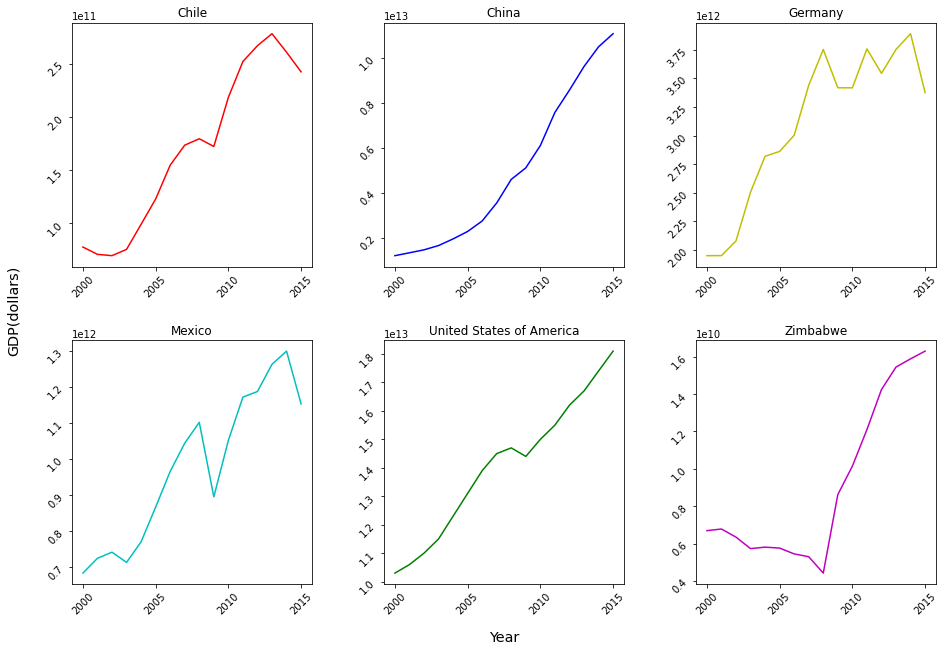

In [7]:
countries = list(lgdp.Country.unique())

print(type(countries))

fig, axs = plt.subplots(2, 3, figsize=(15,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.12, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)

xtick_years = [2000, 2005, 2010, 2015]

for country in countries:
    j = countries.index(country)
    if j < 3:
        i = 0
        k = j
    else:
        i = 1
        k = j - 3
    x=lgdp.Year[lgdp.Country == country]
    y=lgdp['GDP'][lgdp.Country == country]
    axs[i, k].plot(x, y, color=colors[j])
    axs[i, k].tick_params(labelrotation=45)
    axs[i, k].set_xticks(ticks=xtick_years)
    axs[i, k].set_title(label=country)

fig.text(0.5, 0.04, 'Year', ha='center', fontsize='x-large')
fig.text(0.04, 0.5, 'GDP(dollars)', va='center', rotation='vertical', fontsize='x-large')    
plt.show()

### Scatterplots

We have a decent idea of the shape and trend of the data for Life Expectancy and GDP. Are they related? We explore a bit more with some scatter plots.

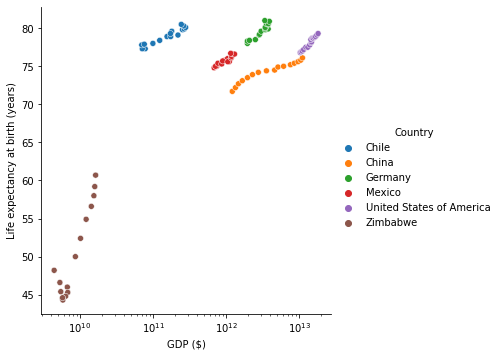

In [61]:

scatter_plot = sns.relplot(x="GDP", y="Life expectancy at birth (years)", hue='Country', data=lgdp)
scatter_plot.set(xscale="log")
plt.xlabel('GDP ($)')

#plt.title("Life Expectancy vs GDP")

plt.savefig('life_exp_gdp_scatter', dpi=300)

There is a pattern to it but its a bit hard to interpret. Lets repeat this analysis but instead break it down by individual countries.

In [9]:
from scipy.stats import pearsonr 

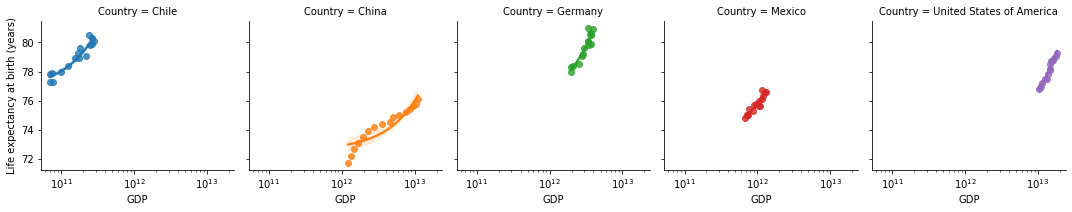

In [10]:
lgdp_wo_zim = lgdp[lgdp.Country != 'Zimbabwe']
lgdp_zim = lgdp[lgdp.Country == 'Zimbabwe']

sea = sns.FacetGrid(lgdp_wo_zim, col='Country', hue='Country', margin_titles=True)

sea.map(sns.regplot, 'GDP', 'Life expectancy at birth (years)')
#sea.map(sns.scatterplot, 'GDP', 'Life expectancy at birth (years)')

sea.set(xscale='log')


Text(0.5, 1.0, 'Zimbabwe')

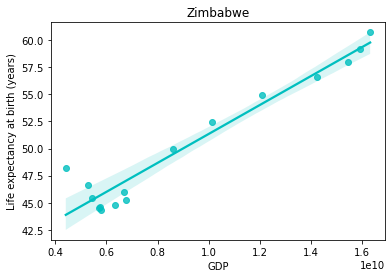

In [11]:
sns.regplot(data=lgdp_zim, x='GDP', y='Life expectancy at birth (years)', color='c')
plt.title('Zimbabwe')

In [12]:
# calculate the pearson's correlation for each country

print("The correlation and p-value for:")
for country in countries:
    lgdp_country = lgdp[lgdp.Country == country]
    corr, pval = pearsonr(x=lgdp_country.GDP, y=lgdp_country['Life expectancy at birth (years)'])
    corr = round(corr, 3)
    print(f'   {country}: \n     correlation: {corr} \n     pval(two_tailed): {pval}')

The correlation and p-value for:
   Chile: 
     correlation: 0.95 
     pval(two_tailed): 1.865913974658531e-08
   China: 
     correlation: 0.909 
     pval(two_tailed): 1.1250985720700642e-06
   Germany: 
     correlation: 0.933 
     pval(two_tailed): 1.401881553404592e-07
   Mexico: 
     correlation: 0.932 
     pval(two_tailed): 1.4686960248305143e-07
   United States of America: 
     correlation: 0.982 
     pval(two_tailed): 1.7499709269099464e-11
   Zimbabwe: 
     correlation: 0.966 
     pval(two_tailed): 1.2358516366846197e-09


Each country shows a positive correlation between life expectancy and gdp.

## Conclusion

The following inferences were drawn from the data provided:

* Life expectancy increased over time in each of the six countries(Chile, China, Germany, Mexico, United States of America).
* Life expectancy increased most dramatically in Zimbabwe. A 15 year gain since 2000.
* Life expectancy is positively correlated with gdp in each country we looked at.
* Average calculated life expectancy in each country for persons born between 2000-2015:
  * Chile: 78.94
  * China: 74.26
  * Germany: 79.66
  * Mexico: 75.72
  * United States of America: 78.06
  * Zimbabwe: 50.09
* There was a sizable range in life expectancies between countries. Zimbabwe had the lowest measured life expectancy (44) while Germany had the highest (81) for an individual year between 2000 and 2015.

The countries were varied in their GDP and geography. The United States was the wealthiest overall followed by(in descending order) China, Germany, Mexico, Chile, and Zimbabwe. It seems clear that the overall wealth(gdp) of a nation would not be enough to explain the variation between nations. For while it is true that we found a strong correlation(not causation) between life expectancies and gdp within countries, that correlation weakened significantly when looking at the data between countries.      


## Additional Research 

Obviously, one of the factors determining life expectancy at birth would be an overall measure of country wealth. An improvement on this could be __gdp/capita__. Other more granular measures of wealth might work as well or better assuming the data is there for it. Possibilities include:
* Median net worth.
* Median net worth of the bottom 50% of persons or numerous variations on this idea.
* The Gini coefficient which is one measure of the spread between the wealthy and less wealthy in a country alongside its gdp used together. https://en.wikipedia.org/wiki/Gini_coefficient
